In [1]:
pip install hrv-analysis

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
HRData1 = pd.read_csv('HRData1.txt',delim_whitespace = True,encoding = 'utf8')
del HRData1['timestamp:']
del HRData1['ADC']
HRData1

,HeartRate4sAverage,HeartRate30sAverage
0,69,70
1,69,70
2,69,70
3,69,70
4,69,70
...,...,...
1699344,125,113
1699345,125,113
1699346,125,113
1699347,125,113


In [3]:
HRV = HRData1['HeartRate30sAverage']


In [4]:
for i in range(1699348):
    HRV.iat[i]=(HRV.iat[i]+HRV.iat[i+1])/2

<AxesSubplot:>

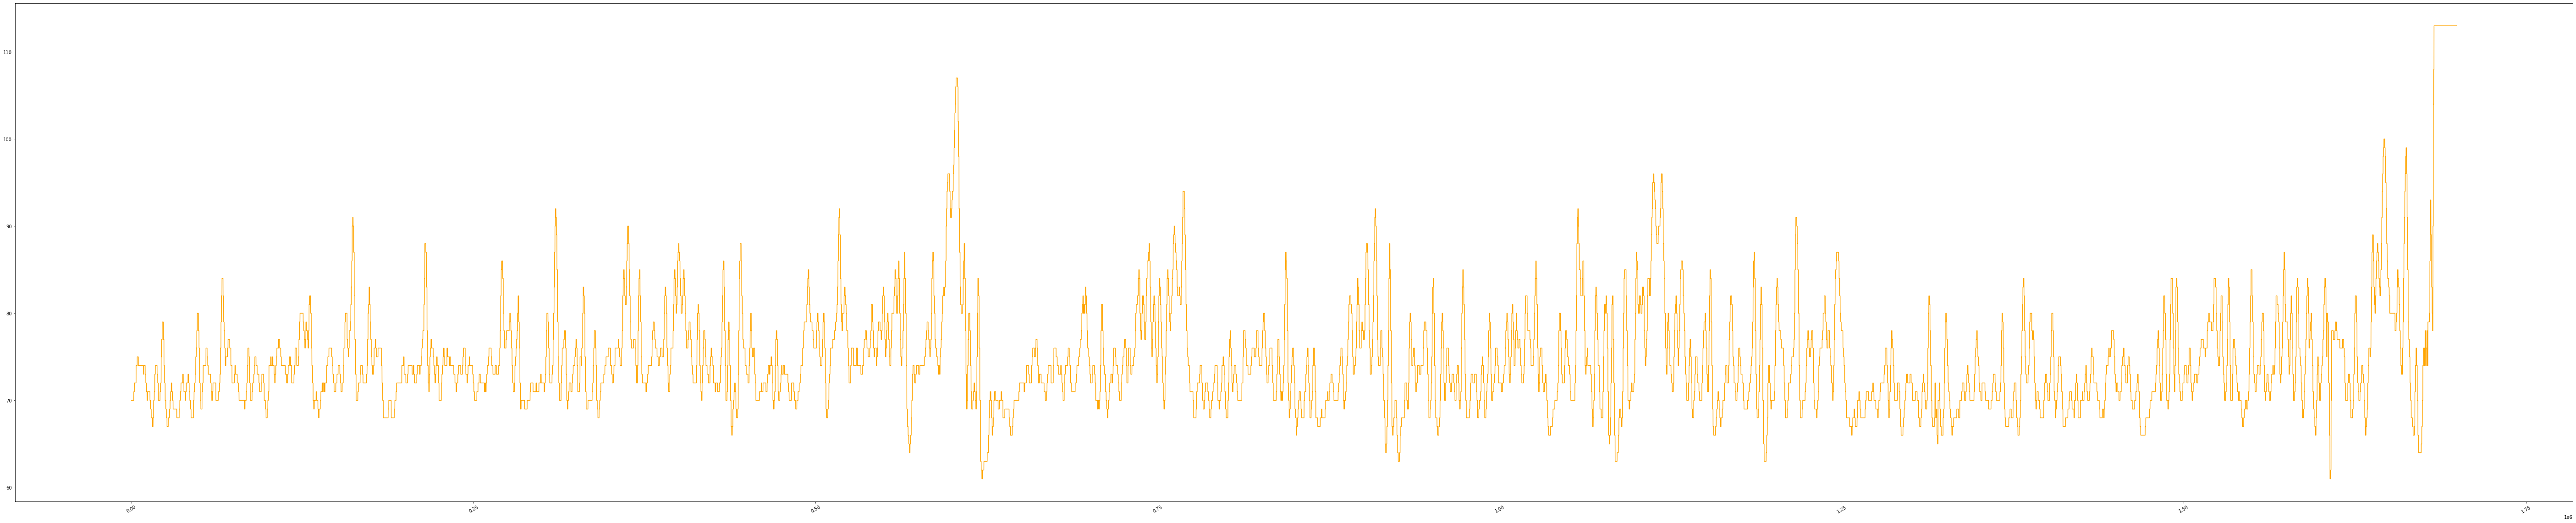

In [5]:
HRV.plot(kind = 'line',rot = 30,figsize=(100,20),color='orange')

In [6]:
from hrvanalysis import get_time_domain_features

time_domain_features = get_time_domain_features(HRV)

In [7]:
time_domain_features

{'mean_nni': 74.72281091170795,
 'sdnn': 6.682754336026516,
 'sdsd': 0.06340170625891099,
 'nni_50': 0,
 'pnni_50': 0.0,
 'nni_20': 0,
 'pnni_20': 0.0,
 'rmssd': 0.06340171130832878,
 'median_nni': 73.0,
 'range_nni': 52,
 'cvsd': 0.0008484920539625293,
 'cvnni': 0.0894339259255493,
 'mean_hr': 808.436683756533,
 'max_hr': 983.6065573770492,
 'min_hr': 530.9734513274336,
 'std_hr': 62.155347378470296}

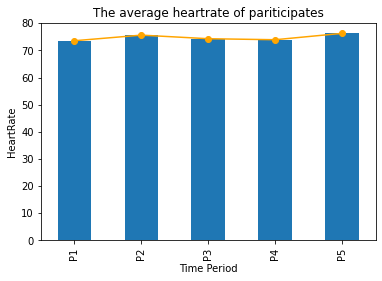

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
means1 = HRV[0:339869].mean()
errors1 = HRV[0:339869].std()
means2 = HRV[339870:679738].mean()
errors2 = HRV[339870:679738].std()
means3 = HRV[679739:1019607].mean()
errors3 = HRV[679739:1019607].std()
means4 = HRV[1019608:1359477].mean()
errors4 = HRV[1019608:1359477].std()
means5 = HRV[1359478:1699348].mean()
errors5 = HRV[1359478:1699348].std()

data = {'Period1': [means1],'Period2':[means2],'Period3':[means3],'Period4':[means4],'Period5':[means5]}  
data1=pd.Series([means1,means2,means3,means4,means5])
data2 = {'Period1': [errors1],'Period2':[errors2],'Period3':[errors3],'Period4':[errors4],'Period5':[errors5]} 
df = pd.DataFrame(data)  
errors=pd.DataFrame(data2)
data1.plot.bar(yerr = errors)
plt.title("The average heartrate of pariticipates")
plt.xlabel("Time Period")
plt.ylabel("HeartRate")
plt.xticks([0,1,2,3,4],["P1","P2","P3","P4","P5"])
plt.plot([0,1,2,3,4], [means1,means2,means3,means4,means5], '-o', color='orange')
plt.show()

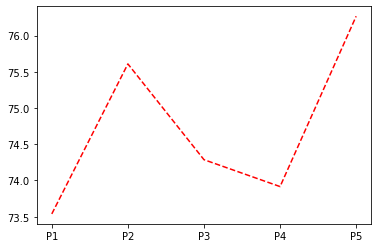

In [9]:
z = np.polyfit([1,2,3,4,5], data1, 1)
p = np.poly1d(z)
plt.xticks([1,2,3,4,5],["P1","P2","P3","P4","P5"])
plt.plot([1,2,3,4,5],data1,'r--')

In [10]:
errors

,Period1,Period2,Period3,Period4,Period5
0,3.709075,6.210981,5.043618,6.09563,10.146596


In [11]:
df

,Period1,Period2,Period3,Period4,Period5
0,73.53814,75.608021,74.286432,73.915394,76.265952


<AxesSubplot:>

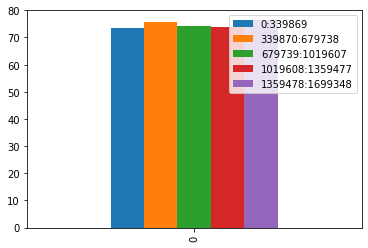

In [12]:
data = {'0:339869': [means1],'339870:679738':[means2],'679739:1019607':[means3],'1019608:1359477':[means4],'1359478:1699348':[means5]}  
df = pd.DataFrame(data)  

df.plot.bar(yerr = errors)

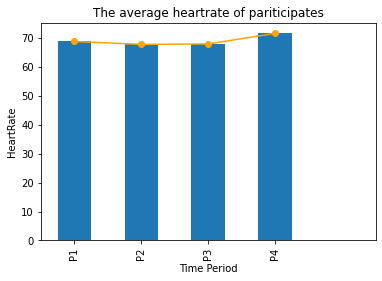

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
HRData2 = pd.read_csv('HRData2.txt',delim_whitespace = True,encoding = 'utf8')
del HRData2['timestamp:']
del HRData2['ADC']
fig,ax=plt.subplots()
HRV2 = HRData2['HeartRate30sAverage']
means1 = HRV2[0:339869].mean()
errors1 = HRV2[0:339869].std()
means2 = HRV2[339870:679738].mean()
errors2 = HRV2[339870:679738].std()
means3 = HRV2[679739:1019607].mean()
errors3 = HRV2[679739:1019607].std()
means4 = HRV2[1019608:1359477].mean()
errors4 = HRV2[1019608:1359477].std()
means5 = HRV2[1359478:1699348].mean()
errors5 = HRV2[1359478:1699348].std()


dataB = {'Period1': [means1],'Period2':[means2],'Period3':[means3],'Period4':[means4],'Period5':[means5]}  
data1B=pd.Series([means1,means2,means3,means4,means5])
data2B = {'Period1': [errors1],'Period2':[errors2],'Period3':[errors3],'Period4':[errors4],'Period5':[errors5]} 
dfB = pd.DataFrame(data)  
errorsB=pd.DataFrame(data2)


data1.plot.bar(yerr = errors)
plt.title("The average heartrate of pariticipates")
plt.xlabel("Time Period")
plt.ylabel("HeartRate")
plt.xticks([0,1,2,3],["P1","P2","P3","P4"])
plt.plot([0,1,2,3,4], [means1,means2,means3,means4,means5], '-o', color='orange')
plt.show()


In [21]:
dfB

,Period1,Period2,Period3,Period4,Period5
0,68.853641,67.851639,67.994418,71.668234,NaN


In [22]:
errorsB

,Period1,Period2,Period3,Period4,Period5
0,3.534609,5.434596,5.153713,9.146675,NaN


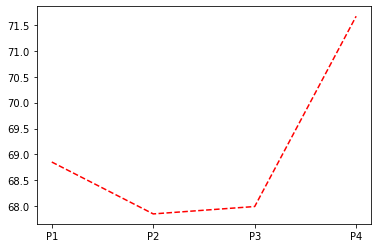

In [16]:
z = np.polyfit([1,2,3,4,5], data1, 1)
p = np.poly1d(z)
plt.xticks([1,2,3,4,5],["P1","P2","P3","P4","P5"])
plt.plot([1,2,3,4,5],data1,'r--')

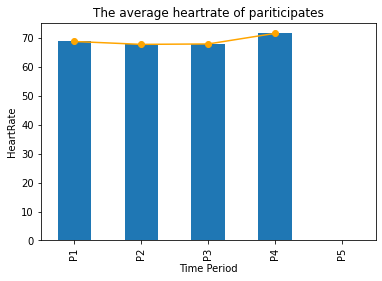

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
HRV = HRData1['HeartRate30sAverage']
means1 = HRV[0:339869].mean()
errors1 = HRV[0:339869].std()
means2 = HRV[339870:679738].mean()
errors2 = HRV[339870:679738].std()
means3 = HRV[679739:1019607].mean()
errors3 = HRV[679739:1019607].std()
means4 = HRV[1019608:1359477].mean()
errors4 = HRV[1019608:1359477].std()
means5 = HRV[1359478:1699348].mean()
errors5 = HRV[1359478:1699348].std()

data = {'Period1': [means1],'Period2':[means2],'Period3':[means3],'Period4':[means4],'Period5':[means5]}  
data1=pd.Series([means1,means2,means3,means4,means5])
data2 = {'Period1': [errors1],'Period2':[errors2],'Period3':[errors3],'Period4':[errors4],'Period5':[errors5]} 
df = pd.DataFrame(data)  
errors=pd.DataFrame(data2)
data1.plot.bar(yerr = errors)
plt.title("The average heartrate of pariticipates")
plt.xlabel("Time Period")
plt.ylabel("HeartRate")
plt.xticks([0,1,2,3,4],["P1","P2","P3","P4","P5"])
plt.plot([0,1,2,3,4], [means1,means2,means3,means4,means5], '-o', color='orange')
plt.show()

In [18]:
df

,Period1,Period2,Period3,Period4,Period5
0,68.853641,67.851639,67.994418,71.668234,NaN


In [19]:
data2=pd.DataFrame(data=data2)
data2

,Period1,Period2,Period3,Period4,Period5
0,3.534609,5.434596,5.153713,9.146675,NaN
